



#Name : Yoginder Singh

#Project : Demographic Dynamics and Health Indicators: A Comprehensive Analysis of Census Data"

#Submission Date :

**The dataset comprises diverse demographic and health indicators, including birth and death rates, fertility, migration, and life expectancy trends across various countries. The process of managing this data involves a sophisticated Data pipeline, beginning with the extraction of specific data points using SQL queries within Google BigQuery. This step ensures efficient and relevant data retrieval from a larger database. Following extraction, the dataset is imported into Google Colab, a cloud-based environment, for exploratory data analysis and cleaning. This stage is crucial for maintaining data integrity and involves addressing missing values, outliers, and potential inaccuracies. The cleaned and analyzed data is then exported to Power BI, where advanced visualization techniques are utilized to create a professional and comprehensive dashboard. This dashboard effectively illustrates key insights through interactive visual elements, making complex demographic patterns and health trends accessible and understandable. The integration of BigQuery, Google Colab, and Power BI in this pipeline underscores a robust approach to data-driven decision-making and insightful analysis..**
```



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

Overview: The United States Census Bureau’s international dataset provides estimates of country populations since 1950 and projections through 2050. Specifically, the dataset includes midyear population figures broken down by age and gender assignment at birth. Additionally, time-series data is provided for attributes including fertility rates, birth rates, death rates, and migration rates.

Update frequency: Historic (none)

Dataset source: United States Census Bureau

Terms of use: This dataset is publicly available for anyone to use under the following terms provided by the Dataset Source - http://www.data.gov/privacy-policy#data_policy - and is provided "AS IS" without any warranty, express or implied, from Google. Google disclaims all liability for any damages, direct or indirect, resulting from the use of the dataset.

See the GCP Marketplace listing for more details and sample queries: https://console.cloud.google.com/marketplace/details/united-states-census-bureau/international-census-data

**## Using Big Query to Import data from Google Cloud Platfrom using API Key and SQL ##**

In [ ]:
# JSON key file
credentials = service_account.Credentials.from_service_account_file(
    '/content/drive/MyDrive/file.json')

client = bigquery.Client(credentials=credentials, project=credentials.project_id)

In [ ]:
query = """

SELECT
A.country_code,
A.country_name,
A.year,
A.crude_birth_rate,
A.crude_death_rate,
A.net_migration,
A.rate_natural_increase,
A.growth_rate,
B.fertility_rate_15_19,
B.fertility_rate_20_24,
B.fertility_rate_25_29,
B.fertility_rate_30_34,
B.fertility_rate_35_39,
B.fertility_rate_40_44,
B.fertility_rate_45_49,
B.total_fertility_rate,
B.gross_reproduction_rate,
B.sex_ratio_at_birth,
C.infant_mortality,
C.infant_mortality_male,
C.infant_mortality_female,
C.life_expectancy,
C.life_expectancy_male,
C.life_expectancy_female,
C.mortality_rate_under5,
C.mortality_rate_under5_male,
C.mortality_rate_under5_female,
C.mortality_rate_1to4,
C.mortality_rate_1to4_male,
C.mortality_rate_1to4_female
FROM `bigquery-public-data.census_bureau_international.birth_death_growth_rates` as A
JOIN `bigquery-public-data.census_bureau_international.age_specific_fertility_rates` as B
ON
A.country_code = B.country_code
AND A.country_name = B.country_name
AND A.year = B.year
JOIN `bigquery-public-data.census_bureau_international.mortality_life_expectancy` as C
ON
A.country_code = C.country_code
AND A.country_name = C.country_name
AND A.year = C.year;
"""
df = client.query(query).to_dataframe()

In [ ]:
 # first few rows of the dataframe
 df.head()

,country_code,country_name,year,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,fertility_rate_15_19,fertility_rate_20_24,...,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
0,CD,Chad,1993,47.80,18.71,-23.09,2.909,0.600,194.0,314.0,...,100.07,48.18,46.82,49.59,202.70,210.76,194.31,106.36,107.97,104.72
1,CD,Chad,1994,47.71,18.31,-0.20,2.940,2.920,194.0,314.0,...,98.96,48.37,47.01,49.79,200.09,208.08,191.78,104.56,106.06,103.01
2,CD,Chad,1995,48.02,17.90,21.95,3.012,5.207,196.0,316.4,...,97.85,48.57,47.20,49.98,197.52,205.44,189.28,102.78,104.19,101.35
3,CD,Chad,1996,48.35,17.51,-0.14,3.084,3.070,198.1,318.9,...,96.76,48.76,47.39,50.18,194.98,202.83,186.81,101.04,102.35,99.70
4,CD,Chad,1997,48.74,17.25,0.18,3.149,3.168,200.1,321.3,...,95.68,48.95,47.58,50.37,192.46,200.25,184.37,99.31,100.53,98.07


In [ ]:
df.shape

(15016, 30)

In [ ]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  15016 non-null  object 
 1   country_name                  15016 non-null  object 
 2   year                          15016 non-null  Int64  
 3   crude_birth_rate              15016 non-null  float64
 4   crude_death_rate              15016 non-null  float64
 5   net_migration                 15016 non-null  float64
 6   rate_natural_increase         15016 non-null  float64
 7   growth_rate                   15016 non-null  float64
 8   fertility_rate_15_19          15016 non-null  float64
 9   fertility_rate_20_24          15016 non-null  float64
 10  fertility_rate_25_29          15016 non-null  float64
 11  fertility_rate_30_34          15016 non-null  float64
 12  fertility_rate_35_39          15016 non-null  float64
 13  f

In [ ]:
# Checking for the missing value inthe data set
df.isnull().sum()

country_code                    0
country_name                    0
year                            0
crude_birth_rate                0
crude_death_rate                0
net_migration                   0
rate_natural_increase           0
growth_rate                     0
fertility_rate_15_19            0
fertility_rate_20_24            0
fertility_rate_25_29            0
fertility_rate_30_34            0
fertility_rate_35_39            0
fertility_rate_40_44            0
fertility_rate_45_49            0
total_fertility_rate            0
gross_reproduction_rate         0
sex_ratio_at_birth              0
infant_mortality                0
infant_mortality_male           0
infant_mortality_female         0
life_expectancy                 0
life_expectancy_male            0
life_expectancy_female          0
mortality_rate_under5           0
mortality_rate_under5_male      0
mortality_rate_under5_female    0
mortality_rate_1to4             0
mortality_rate_1to4_male        0
mortality_rate

**Exploratory Data Analysis (EDA)**

In [ ]:
df1 = df.drop('year', axis = 1)
df1.describe()

,crude_birth_rate,crude_death_rate,net_migration,rate_natural_increase,growth_rate,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,...,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
count,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,...,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.000000,15016.00000
mean,20.605202,8.961052,-0.229858,1.164401,1.103004,46.048815,122.893743,152.892086,127.116520,74.196815,...,26.230204,71.694214,69.240286,74.267125,41.630071,44.524857,38.621508,14.067214,14.556960,13.56509
std,11.705203,4.188454,29.947897,1.128683,3.189014,45.203696,73.573414,62.226244,56.018149,51.402214,...,33.194190,10.292252,9.906617,10.782822,57.564379,59.950591,55.216502,26.286072,26.495131,26.16639
min,3.620000,1.170000,-831.810000,-3.265000,-168.944000,0.000000,9.500000,34.100000,23.100000,7.200000,...,0.730000,5.430000,5.330000,5.520000,1.440000,1.660000,1.210000,0.200000,0.210000,0.00000
25%,11.147500,6.170000,-2.620000,0.242000,0.200750,13.400000,66.800000,111.300000,93.000000,38.600000,...,5.210000,67.025000,64.440000,69.490000,6.927500,7.630000,6.120000,0.990000,1.110000,0.85750
50%,16.600000,8.010000,-0.160000,1.029000,0.921000,27.900000,95.300000,129.300000,107.400000,53.600000,...,12.140000,74.390000,71.740000,77.210000,16.770000,18.695000,14.690000,2.800000,3.140000,2.43000
75%,27.912500,10.800000,1.380000,2.099000,2.006250,63.900000,166.900000,184.225000,148.900000,93.100000,...,33.320000,79.330000,76.650000,82.270000,49.622500,54.715000,45.000000,12.970000,14.065000,11.90250
max,58.740000,65.430000,1693.010000,4.036000,168.887000,237.400000,363.300000,369.200000,338.300000,282.900000,...,281.220000,91.580000,88.690000,94.970000,625.580000,633.330000,617.610000,512.760000,518.590000,506.87000


<ipython-input-33-1f1406066b4e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  snsheatmap = sns.heatmap(df.corr(),annot = True, cmap ="Greens")


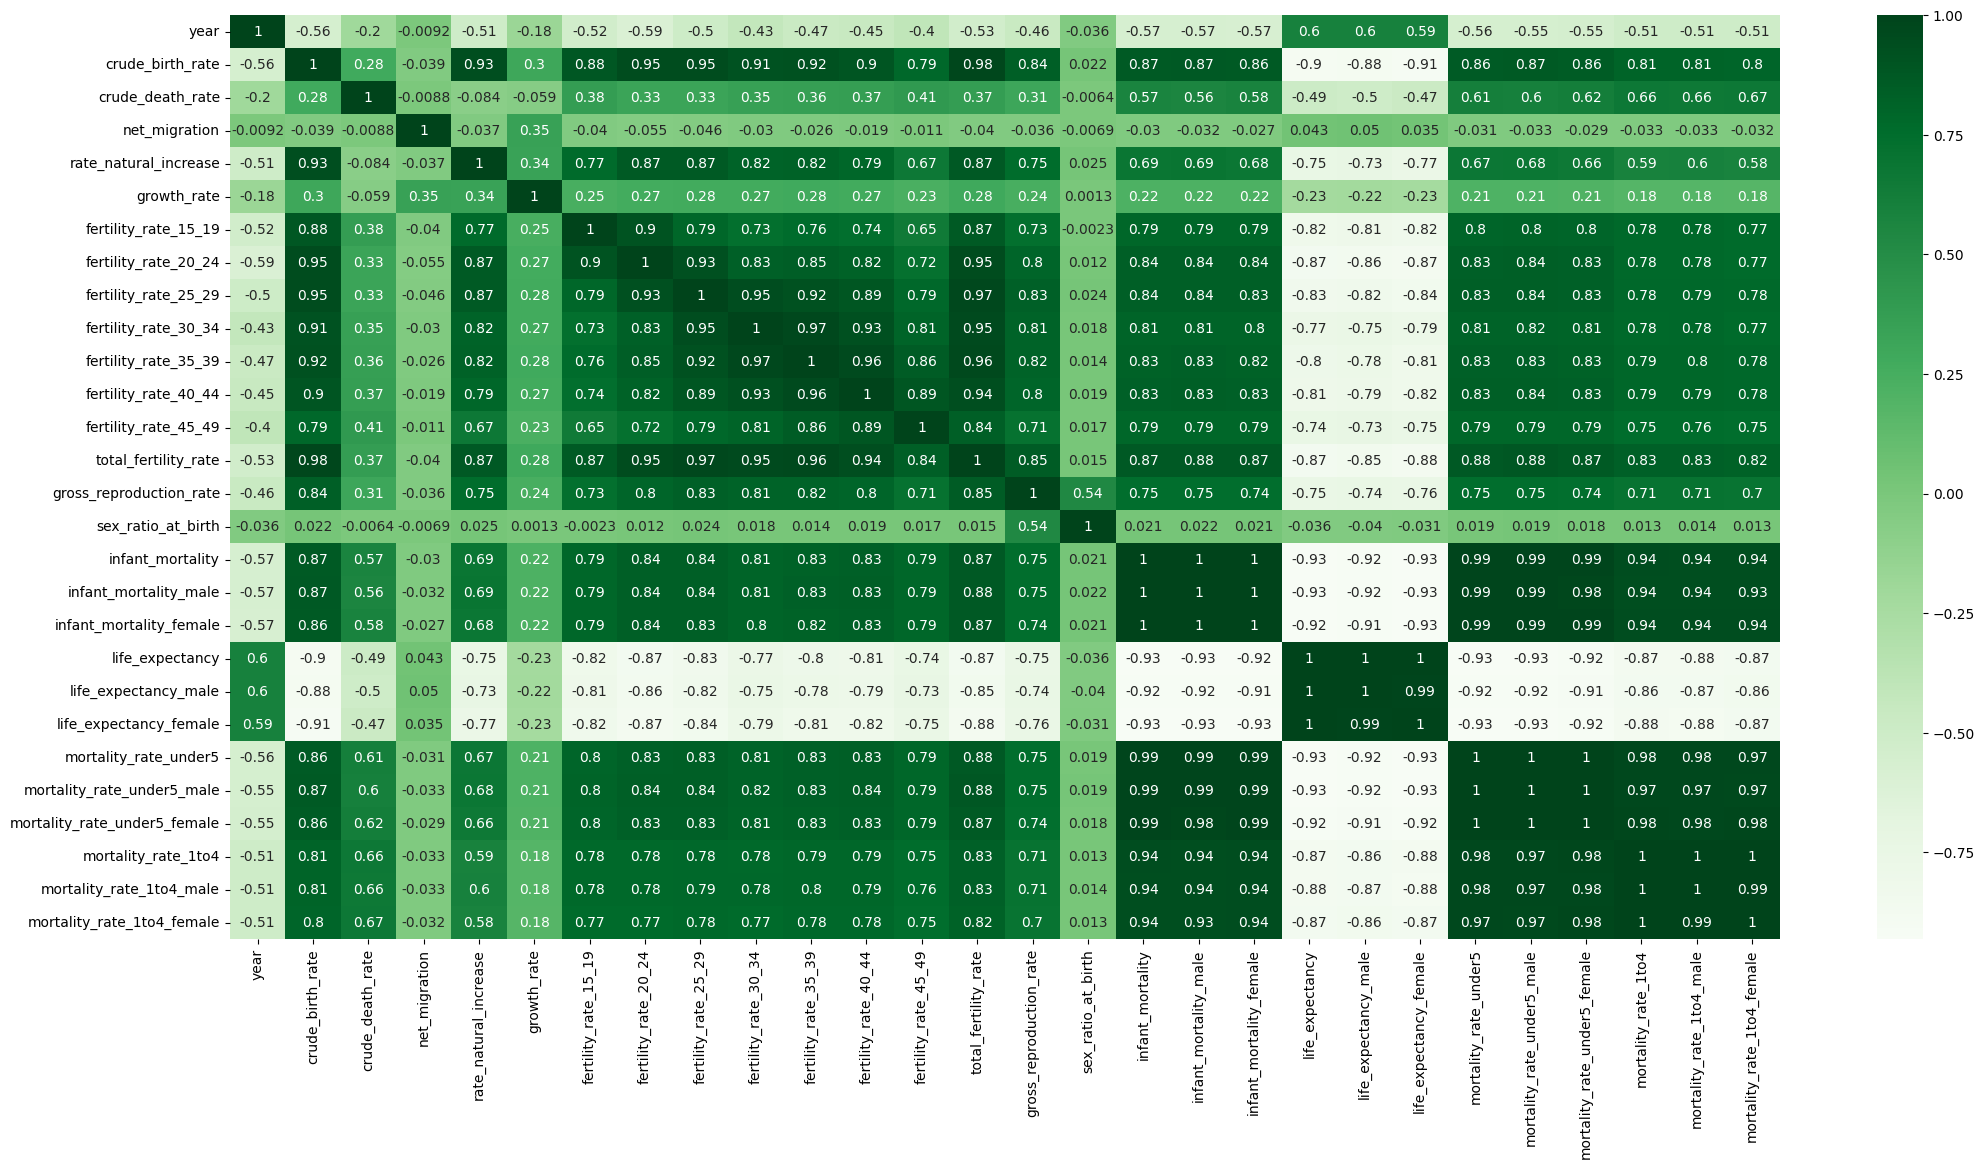

In [ ]:
# Checking for correlation

plt.figure(figsize=(25, 12))
snsheatmap = sns.heatmap(df.corr(),annot = True, cmap ="Greens")
plt.show()

Based on correlation matrix we prepared the pairplot of following column:



Crude Birth Rate: It's a fundamental demographic measure and seems to have varying degrees of correlation with other measures.

Total Fertility Rate: This is a key measure of fertility and shows the potential for future growth, which is not highly correlated with the crude birth rate.

Life Expectancy Female: Chosen over life expectancy male due to the social and health factors that might differ between genders.

Infant Mortality: A critical indicator of health and wellbeing in a country, and it's interesting to see how this relates to life expectancy and fertility rates.

Gross Reproduction Rate: It's related to fertility but focuses on female births, providing a different perspective on population replacement levels.

Mortality Rate Under 5: This provides additional insight into child survival and health beyond the first year (infant mortality).

Net Migration: Migration can significantly affect population structure and growth, and it has a low to moderate correlation with most of the other variables.

In [ ]:
selected_columns = [
    'crude_birth_rate',
    'total_fertility_rate',
    'life_expectancy_female',
    'infant_mortality',
    'gross_reproduction_rate',
    'mortality_rate_under5',
    'net_migration'
]

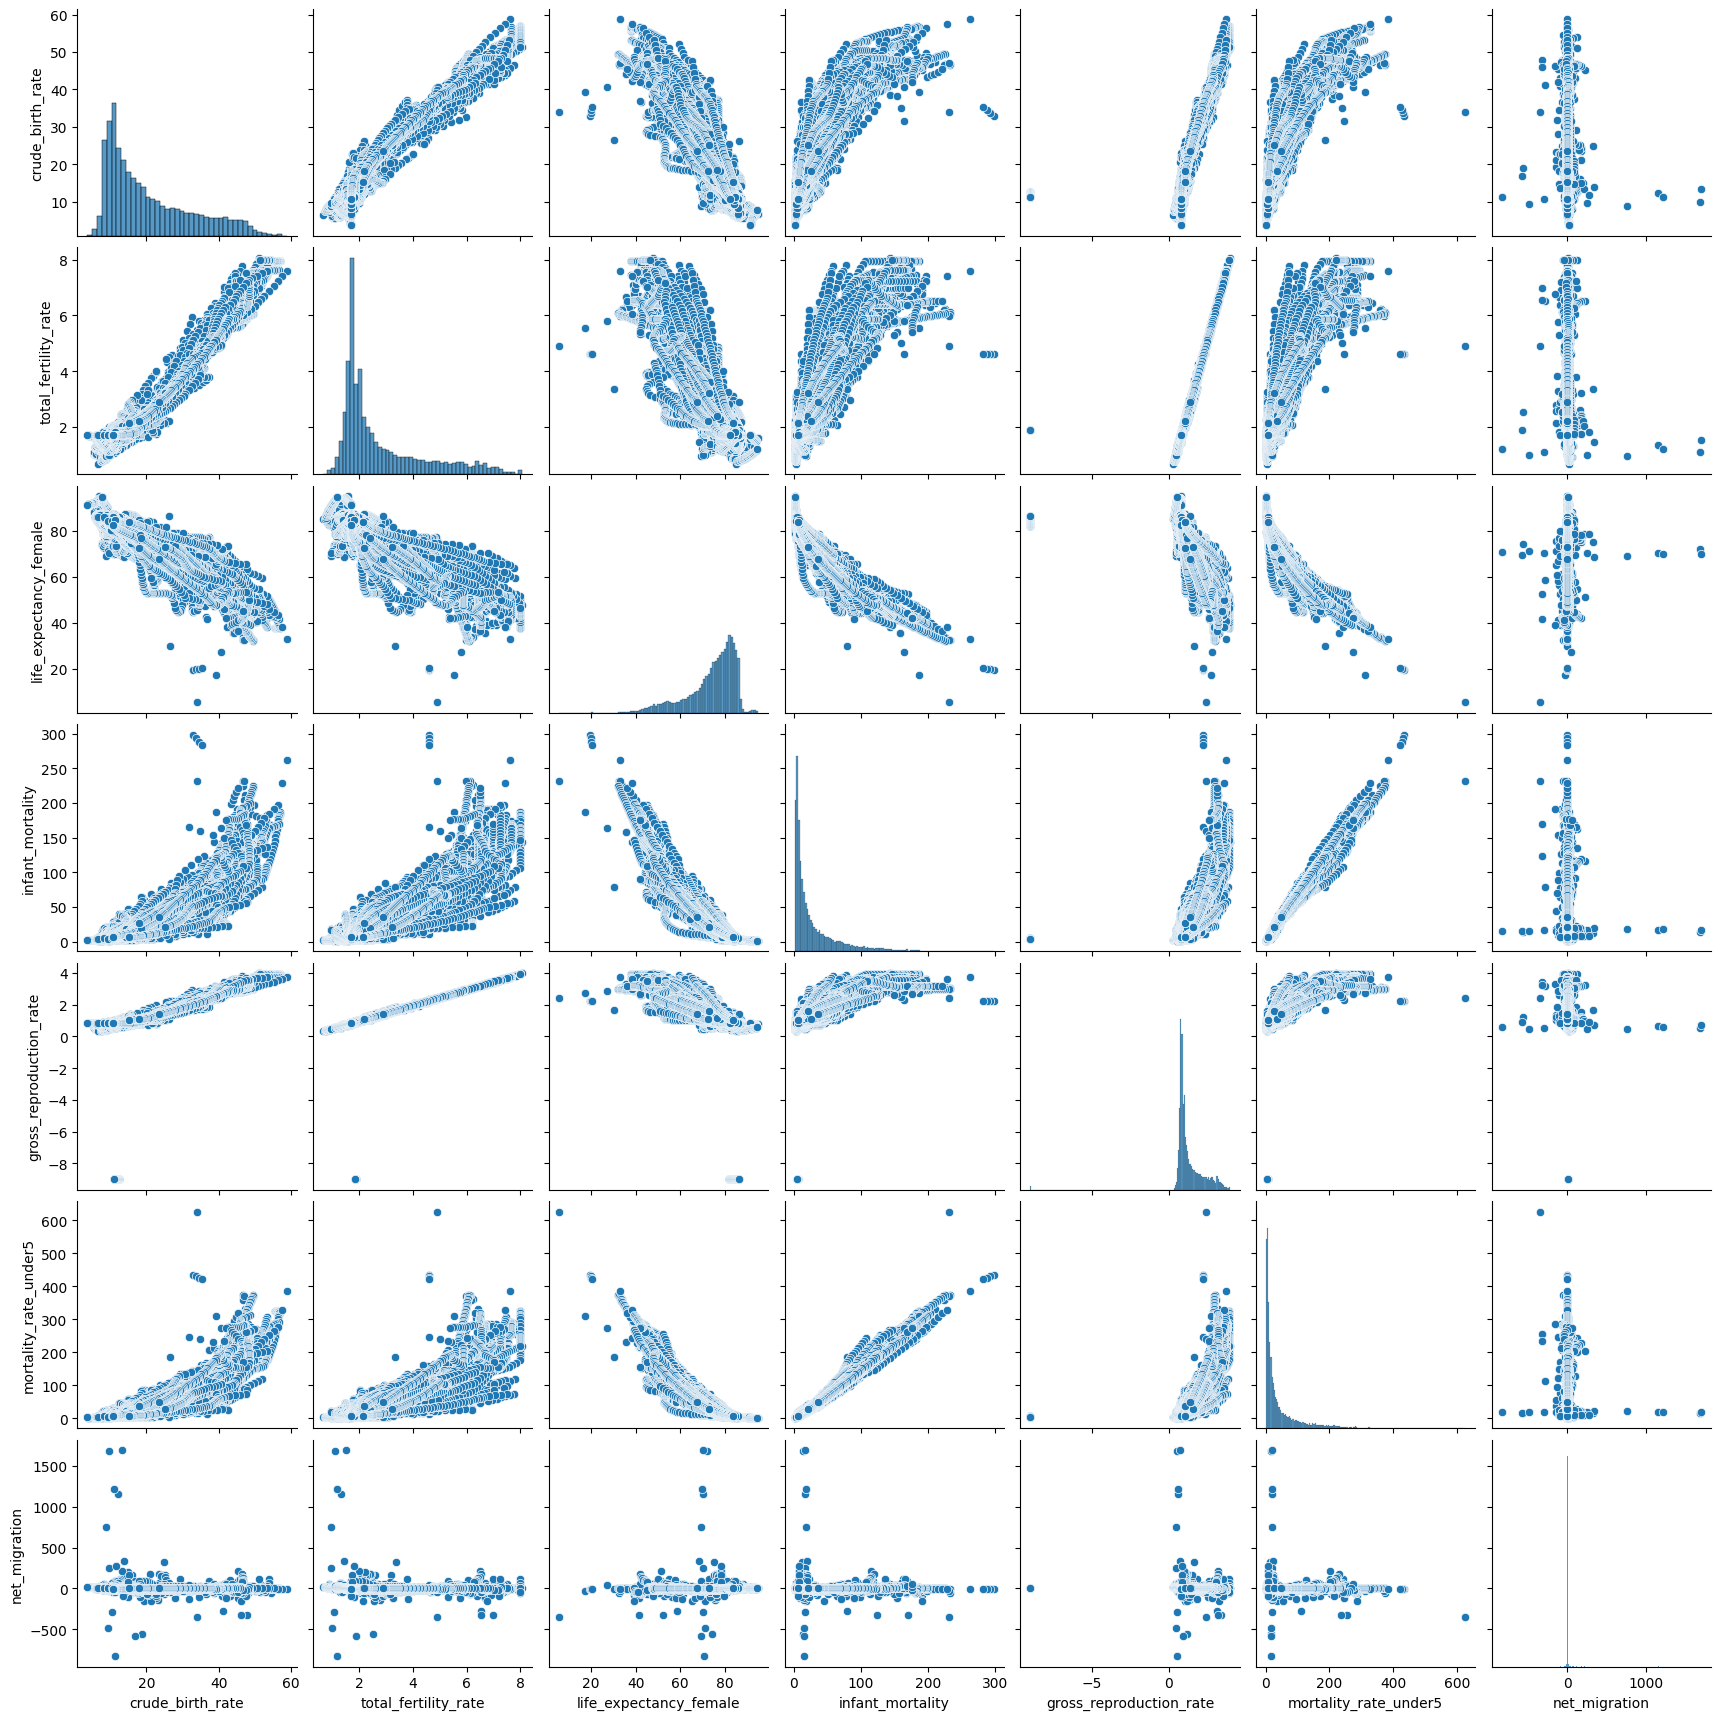

In [ ]:
sns.pairplot(df[selected_columns])

**Correlations:** Negative correlations are evident, such as between 'total_fertility_rate' and 'life_expectancy_female', indicating that as fertility decreases, female life expectancy tends to increase.

**Distributions:** Most variables are right-skewed, with a majority of countries having lower rates of demographic indicators like fertility and mortality.

**Outliers:** The variable 'net_migration' shows notable outliers, suggesting extreme migration scenarios for certain countries.

**Data Density:** Data points are densely clustered in moderate values for 'crude_birth_rate' and 'total_fertility_rate', reflecting commonality in reproductive rates across the dataset.

**Potential Issues:** Patterns of straight lines in plots involving 'net_migration' could point to data reporting issues or a large number of countries with no net migration.

**Variable Relationships:** The plot between 'infant_mortality' and 'life_expectancy_female' suggests a non-linear relationship, with life expectancy gains slowing as infant mortality approaches lower rates.

**Infant Mortality vs. Mortality Under 5:** The strong positive correlation between infant mortality and under-5 mortality reflects their shared influences on child health outcomes.

**Reproductive Indicators:** Fertility indicators correlate positively with one another, consistent with their common demographic influences.

**Migration:** The 'net_migration' variable displays weak and complex relationships with other demographic measures, implying diverse migration dynamics.

***__________________________________________________________________________***
### Saving File to GDrive ###

In [ ]:
Census_data = df

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Project/Census_data.csv'

In [ ]:
Census_data.to_csv(file_path, index=False)